In [2]:
library("ggplot2")
library("fitdistrplus")
library("repr")
library("evd")
library("VGAM")

# Change plot size to 4 x 3
options(repr.plot.width=4, repr.plot.height=3)

In [34]:
df<-read.table("125_3_ethanol.csv",skip = 47, header = F,sep = ",")
names(df)=c("Index","Time","Amps","Volts")
Index <- df$Index
Time <- df$Time
Amps <- df$Amps
Volts <- df$Volts
#Name<- list("norm", "lnorm", "exp" , "pois", "cauchy", "gamma", "logis", "nbinom", "geom", "beta", "weibull" , "invgamma","llogis", "invweibull", "pareto1", "pareto", "lgamma", "trgamma", "invtrgamma" )
fit1 <- fitdist(abs(Volts[120:630]),  "lnorm")  # we assume my_data ~ Normal(?,?)
fit2 <- fitdist(abs(Volts[120:630]), "gamma")
fit3 <- fitdist(abs(Volts[120:630]), "norm")  # we assume my_data ~ Normal(?,?)
fit6 <- fitdist(abs(Volts[120:630]), "weibull")
fw<-gofstat(list(fit1,fit2,fit3,fit6))
fw$chisqpvalue
fw$kstest

1-mle-lnorm   2-mle-gamma    3-mle-norm 4-mle-weibull 
 1.193624e-01  1.074290e-17  0.000000e+00  4.407719e-17

1-mle-lnorm    2-mle-gamma     3-mle-norm  4-mle-weibull 
"not rejected"     "rejected"     "rejected"     "rejected"

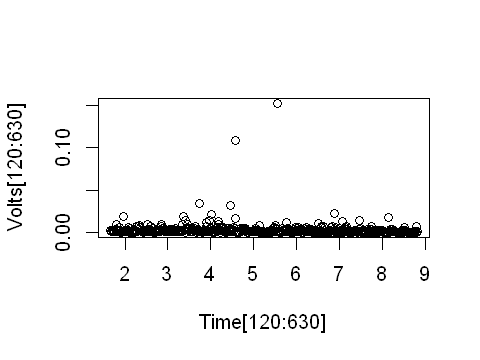

In [13]:
plot(Time[120:630],Volts[120:630])

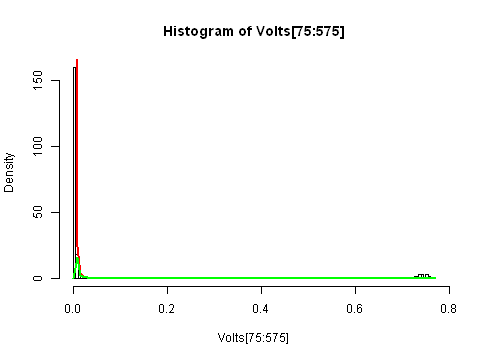

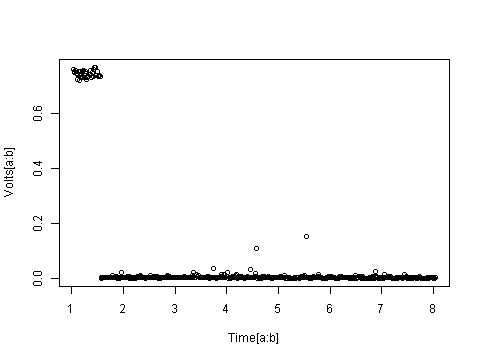

In [36]:

# curve(x, fit$estimate[1], fit$estimate[2]), col="red", lwd=2, add=T)
par(cex=0.6)
hist(Volts[75:575],breaks=200,prob=TRUE)
curve(dweibull(x, fit6$estimate[1], fit6$estimate[2]), col="red", lwd=2,, add=T)
curve(dlnorm(x, fit1$estimate[1], fit1$estimate[2]), col="green", lwd=2,, add=T)
a<-75
b<-575
plot(Time[a:b],Volts[a:b])
# plotdist(Volts[95:630], histo = TRUE, demp = TRUE)

In [20]:
?fitdist

In [69]:
Norm <- rnorm(10000, 1, 0.25)

Warning message in checkparamlist(arg_startfix$start.arg, arg_startfix$fix.arg, :
"Some parameter names have no starting/fixed value but have a default value: shape."Warning message in fitdist(Norm, dfrechet, start = list(loc = 22.147, scale = 38.372)):
"The dfrechet function should return a vector of with NaN values when input has inconsistent parameters and not raise an error"Warning message in fitdist(Norm, dfrechet, start = list(loc = 22.147, scale = 38.372)):
"The pfrechet function should return a vector of with NaN values when input has inconsistent parameters and not raise an error"

<simpleError in optim(par = vstart, fn = fnobj, fix.arg = fix.arg, obs = data,     gr = gradient, ddistnam = ddistname, hessian = TRUE, method = meth,     lower = lower, upper = upper, ...): la fonction ne peut être évaluée aux paramètres initiaux>


ERROR: Error in fitdist(Norm, dfrechet, start = list(loc = 22.147, scale = 38.372)): the function mle failed to estimate the parameters, 
                with the error code 100



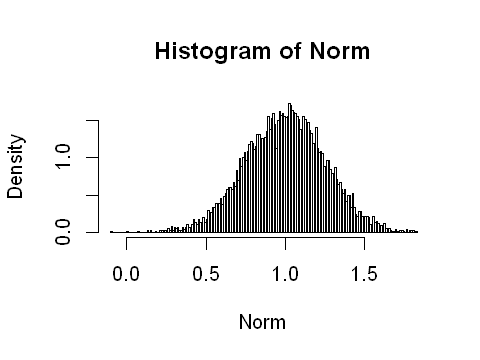

In [123]:
hist(Norm,breaks=200,prob=TRUE)
fit <- fitdist(Norm, dfrechet,start=list(loc=22.147, scale= 38.372))
curve(dnorm(x, fit$estimate[1], fit$estimate[2]), col="red", lwd=2,, add=T)

In [86]:
fw<-gofstat(fit)
fw$kstest

1-mle-norm 
"not rejected"

In [122]:
dgumbel(x, loc= 0, scale = 1, log = FALSE)

function (x, loc = 0, scale = 1, log = FALSE) 
{
    dgev(x, loc = loc, scale = scale, shape = 0, log = log)
}
<bytecode: 0x000000002a40e150>
<environment: namespace:evd>